# AdaBoost

* popular boosting technique which helps to combine multiple 'weak classifiers' into a single 'strong classifier'

## Possible Weak Classifiers

* Decision stump - one-level decision tree
coined in a 1992 ICML paper by Wayne Iba and Pat Langley
* Decision tree
* Multi-layer perception
* SVM



## data read

In [1]:
import os
import pandas as pd
import numpy as np

dir=os.getenv('HOME')+'/Code/git/else/machinelearninginaction/Ch07'
os.chdir(dir)#!head testSet.txt

import adaboost

# 1) data read
datMat,classLabels=adaboost.loadSimpData()
print datMat, classLabels
x=np.mat(datMat)
y=np.mat(classLabels)
print "y=",y

[[ 1.   2.1]
 [ 2.   1.1]
 [ 1.3  1. ]
 [ 1.   1. ]
 [ 2.   1. ]] [1.0, 1.0, -1.0, -1.0, 1.0]
y= [[ 1.  1. -1. -1.  1.]]


## decision stump

* 오류를 최소화하는 각 속성의 분기점을 선택하여 데이터를 이분

* for each dimension $j=1,\cdots,d$
    * sort samples $x_j$
    * for each step (각 속성의 small setp별)
        * threshold $\theta_j$ 속성j 값이 $\theta$보다 크면 +1, 적으면 -1
            * $h(x;j,\theta) =
                \begin{Bmatrix}
                    +1\ if\ x_j > \theta\\
                    -1\ else 
                \end{Bmatrix}$
        * error probability (i.e., y != yhat)를 계산
        * 최소 error를 구함


In [2]:
np.set_printoptions(precision=3) #numpy print format

#Listing 7.1 buildStump
r,c=x.shape
D=np.mat(np.ones((r,1))/r) #equal weights
print adaboost.buildStump(x,y,D)

def getWeakLearner(x,y):
    r,c=x.shape
    D=np.ones((r,1))/r #equal weights
    bestyhat=np.mat(np.zeros((r,1)))
    numSteps=10.0
    bestStump={} # h=[]
    minError=np.inf
    for j in range(c):
        mincol=x[:,j].min()
        maxcol=x[:,j].max()
        step = (maxcol-mincol)/numSteps
        #for i in range(-1,int(numSteps)+1):
        for i in range(int(numSteps)):
            for inequal in ['lt','gt']:
                errors = np.mat(np.ones((r,1)))
                yhat=np.ones((r,1))
                threshold = (mincol + float(i) * step)
                mask=x[:,j]<=threshold if inequal=='lt' else x[:,j]>threshold
                rows=np.where(mask)[0] #taking indices only
                yhat[rows]=-1
                #yhat(5,1) y(1,5) -> y.T(5,1)
                errors[yhat == y.T] = 0
                e = D.T*errors
                #print "mask={0} yhat={1} y={2} errors={3}".format(mask,yhat,y,errors)
                print "dim {0} thresh {1} ineqal {2} e={3}".\
                    format(j, threshold, inequal, e)
                if e < minError:
                    minError = e
                    bestyhat = yhat.copy()
                    bestStump['dim'] = j
                    bestStump['thresh'] = threshold
                    bestStump['ineq'] = inequal
    print bestStump,bestyhat,minError
getWeakLearner(x,y)


({'dim': 0, 'ineq': 'lt', 'thresh': 1.3}, matrix([[ 0.2]]), array([[-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.]]))
dim 0 thresh 1.0 ineqal lt e=[[ 0.4]]
dim 0 thresh 1.0 ineqal gt e=[[ 0.6]]
dim 0 thresh 1.1 ineqal lt e=[[ 0.4]]
dim 0 thresh 1.1 ineqal gt e=[[ 0.6]]
dim 0 thresh 1.2 ineqal lt e=[[ 0.4]]
dim 0 thresh 1.2 ineqal gt e=[[ 0.6]]
dim 0 thresh 1.3 ineqal lt e=[[ 0.2]]
dim 0 thresh 1.3 ineqal gt e=[[ 0.8]]
dim 0 thresh 1.4 ineqal lt e=[[ 0.2]]
dim 0 thresh 1.4 ineqal gt e=[[ 0.8]]
dim 0 thresh 1.5 ineqal lt e=[[ 0.2]]
dim 0 thresh 1.5 ineqal gt e=[[ 0.8]]
dim 0 thresh 1.6 ineqal lt e=[[ 0.2]]
dim 0 thresh 1.6 ineqal gt e=[[ 0.8]]
dim 0 thresh 1.7 ineqal lt e=[[ 0.2]]
dim 0 thresh 1.7 ineqal gt e=[[ 0.8]]
dim 0 thresh 1.8 ineqal lt e=[[ 0.2]]
dim 0 thresh 1.8 ineqal gt e=[[ 0.8]]
dim 0 thresh 1.9 ineqal lt e=[[ 0.2]]
dim 0 thresh 1.9 ineqal gt e=[[ 0.8]]
dim 1 thresh 1.0 ineqal lt e=[[ 0.2]]
dim 1 thresh 1.0 ineqal gt e=[[ 0.8]]
dim 1 thresh 1.11 ineqal lt e=[[

## algorithms

Freund & Schapire, 1999:p.3 A Short Introduction to Boosting

* $(x_1,y_1),(x_2,y_2) \ldots,(x_n,y_n)$: 학습데이터
    * $x \in \mathbb{R}^{m \times n}$
    * $y \in \{+1,-1\}$
* $D_1(i) = \frac 1m$
* for t=1,...,T:
    * construct distribution $D_t$ on {1,...,m}
    * find weak hypothesis
        $h_t: X -> {-1,+1}$
        $\epsilon_t=Pr_{D_t}[h_t(x_i) \ne y_i]$
    * $\alpha_t=\frac 12 ln (\frac{1-\epsilon_t}{\epsilon_t})$
    * update
        $D_{t+1}(i) = \frac{D_t(i)}{Z_t} \times 
        \begin{Bmatrix}
            e^{-\alpha_t}\ if\ h_t(x_i) = y_i\\
            e^{\alpha_t}\ if\ h_t(x_i) \ne y_i 
        \end{Bmatrix}$
        $= \frac{D_t(i) exp(-\alpha_t y_i ht_t(x_i)}{Z_t}$
        ($Z_t$ 는 D분포를 만들기 위한 정규화)
* final hyothesis $H(x)=sign(\sum_{t=1}^T \alpha_t h_t(x))$
￼

알고리듬에 따른 개발
1. data read
2. Find the weak learner (the best decision stump)
3. Calculate alpha
4. Calculate the new weight vector – D
5. Update the aggregate class estimate
6. If the error rate ==0.0 : break out of the for loop


$\alpha_t$ measures the importance assigned to $h_t(x_i)$

* $\alpha_t=\frac 12 ln (\frac{1-\epsilon_t}{\epsilon_t})$
* error는 0 ~ 1
* error는 0.5를 분기로 크면 음수


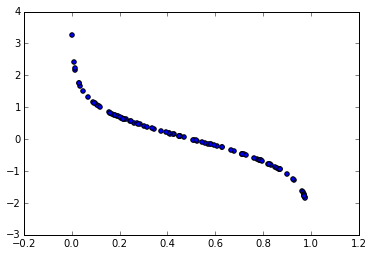

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
alpha=lambda e: 0.5*np.log((1-e)/e)
x=np.random.rand(100)
y=alpha(x)

plt.scatter(x,y)
plt.show()

source: AdaboostExample.pdf

* 시작 - D값을 동일한 값으로 초기화

* t=1
    * $h_1(x) = I(x<2.5)$
    * x0=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    * yhat=[1, 1, 1, -1, -1, -1, -1, -1, -1, -1]
    * y=[1, 1, 1, -1, -1, -1, 1, 1, 1, -1]
    * $\epsilon_1=0.3 \alpha_1=0.424$
    * D=[ 0.071  0.071  0.071  0.071  0.071  0.071  0.167  0.167  0.167  0.071]
    * 처음에 D값을 동일하게 초기화해서 시작. 정확하게 예측한 경우(0.1->0.071) 틀리면 (0.1-> 0.167)
    * $f_1(x) = 0.424 I(x<2.5)$ 오류 3개
* t=2
    * $h_2(x) = I(x<8.5)$
    * x0=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    * yhat=[1, 1, 1, 1, 1, 1, 1, 1, 1, -1]
    * y=[1, 1, 1, -1, -1, -1, 1, 1, 1, -1]
    * $\epsilon_2=0.214285714286 \alpha_2=0.650$
    * D=[ 0.045  0.045  0.045  0.167  0.167  0.167  0.106  0.106  0.106  0.045]
    * $f_2(x) = 0.424 I(x<2.5) + 0.650 I(x<8.5)$ 오류 3개
* t=3
    * $h_3(x) = I(x>5.5)$
    * x0=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    * yhat=[-1, -1, -1, -1, -1, -1, 1, 1, 1, 1]
    * y=[1, 1, 1, -1, -1, -1, 1, 1, 1, -1]
    * $\epsilon_3=0.181818181818 \alpha_3=0.752$
    * D=[ 0.125  0.125  0.125  0.102  0.102  0.102  0.065  0.065  0.065  0.125]
    * $f_3(x) = 0.424 I(x<2.5) + 0.650 I(x<8.5) + 0.752 I(x>5.5)$ 오류 0개

alphas=[0.42364893019360172, 0.64964149206513011, 0.75203869838813664]


In [3]:
import numpy as np

np.set_printoptions(precision=3) #numpy print format
def buildWeakLearner1():
    h=[]
    h1=lambda x:1 if x<2.5 else -1
    h2=lambda x:1 if x<8.5 else -1
    h3=lambda x:1 if x>5.5 else -1
    h.append(h1)
    h.append(h2)
    h.append(h3)
    return h

# x,y -> list
def adaboostTrain(x,y,h):
    alphas=[]
    r=len(x)
    D=np.ones(r)/r # initially equal porb. (then keep updated) 
    K = len(h)
    for k in range(K):
        # 1) get results from a weak classifier
        yhat=[h[k](i) for i in x]
        # 2) compute alpha
        errors =[y[i] != yhat[i] for i in range(r)]
        e=(D*errors).sum()
        alpha=0.5 * np.log((1-e)/e) #
        print "x={0}\nyhat={1}\ny={2}\nerrors={3} alpha={4:0.3f}".format(x,yhat,y,e,alpha)
        # 3) update
        Dk = np.zeros(r)
        for i in range(r):
            if errors[i] == 1: Dk[i] = D[i] * np.exp(alpha)
            else: Dk[i] = D[i] * np.exp(-alpha)
        D = Dk / Dk.sum()
        print "D={0}".format(D)
        alphas.append(alpha)
    return alphas

def adaboostClassify(x,h,alphas):
    #r=x.shape[0]
    K=len(h)
    #for i in range(r):
    #    hx = [alphas[k]*h[k](x[i]) for k in range(K)]
    hx = [alphas[k]*h[k](x) for k in range(K)]
    return np.sign(sum(hx))

def test1():
    x0=[0,1,2,3,4,5,6,7,8,9]
    y=[1,1,1,-1,-1,-1,1,1,1,-1]
    h=buildWeakLearner1()
    alphas=adaboostTrain(x0,y,h)
    xtest=[3]
    yhat=adaboostClassify(xtest,h,alphas)
    print yhat

test1()


x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
yhat=[1, 1, 1, -1, -1, -1, -1, -1, -1, -1]
y=[1, 1, 1, -1, -1, -1, 1, 1, 1, -1]
errors=0.3 alpha=0.424
D=[ 0.071  0.071  0.071  0.071  0.071  0.071  0.167  0.167  0.167  0.071]
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
yhat=[1, 1, 1, 1, 1, 1, 1, 1, 1, -1]
y=[1, 1, 1, -1, -1, -1, 1, 1, 1, -1]
errors=0.214285714286 alpha=0.650
D=[ 0.045  0.045  0.045  0.167  0.167  0.167  0.106  0.106  0.106  0.045]
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
yhat=[-1, -1, -1, -1, -1, -1, 1, 1, 1, 1]
y=[1, 1, 1, -1, -1, -1, 1, 1, 1, -1]
errors=0.181818181818 alpha=0.752
D=[ 0.125  0.125  0.125  0.102  0.102  0.102  0.065  0.065  0.065  0.125]
-1.0


* X축 fp rate, Y축 tp rate
* 대각선 y = x는 무작위 분류의 결과
* (0, 0) - no fp, no tp
* (1, 1) - unconditional positive classifications
* (0, 1) - 100% 분류

* ROC - sensitivity (Y=TP rate) vs 1-specificity (X=FP rate)
예: 대장암bowel cancer 내시경endoscopy 2030명.
이 경우, 실제 그 결과에 대해 TP=20, FP=180, FN=10, TN=1820

                   질병있는  질병없는 경우
    검진결과 질병있다  TP=20     FP=180
    검진결과 질병없다  FN=10     TN=1820

    * sensitivity = 20/(20+10) = 67%
    * specificity = 1820/(180+1820) = 91%
    * FP rate = type 1 = 1-specificity = FP/(FP+TN) = 180/(180+1820) = 9%
    * FN rate = type 2 = 1-sensitivity = FN/(TP+FN) = 10/(20+10) = 33%


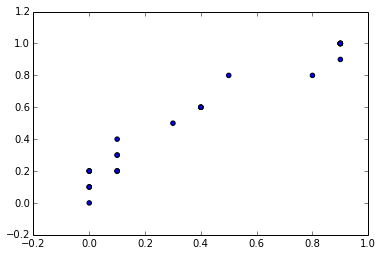

In [2]:
%matplotlib inline

import numpy as np

def myROC():
    import matplotlib.pyplot as plt 
    x = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1])
    y = np.array([1,1,0, 1, 1, 1, 0, 0, 1, 0, 1,0, 1, 0, 0, 0, 1 , 0, 1, 0]) 
    roc_x = []
    roc_y = []
    minx = min(x)
    maxx = max(x)
    threshold = np.linspace(minx, maxx, 30) 
    FP=0
    TP=0
    N = sum(y)
    P = len(y) - N 
    for (i, T) in enumerate(threshold):
        for i in range(0, len(x)):
            if (x[i] > T): 
                if (y[i]==1):
                    TP = TP + 1 
                if (y[i]==0):
                    FP = FP + 1 
        roc_x.append(FP/float(N))
        roc_y.append(TP/float(P))
        FP=0
        TP=0
    plt.scatter(roc_x, roc_y)
    plt.show()

myROC()
